In [3]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline
import statistics

### 1. Загрузить файл auto.csv

In [4]:
temp = pd.read_csv('auto.csv')
temp.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### 2. Рассчитать основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение)

In [6]:
temp.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


###  3. Рассчитать и визуализировать корреляционную матрицу для переменных

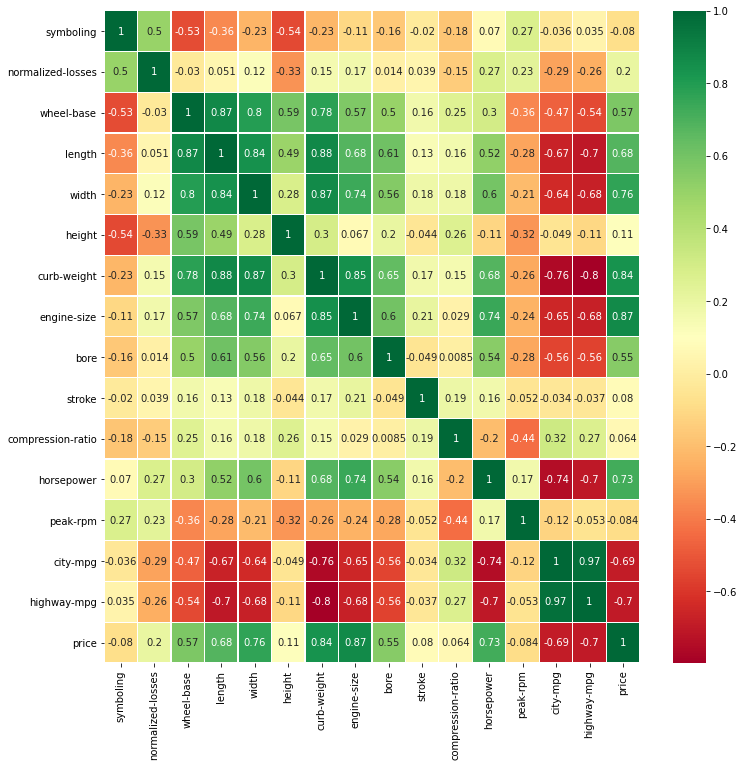

In [7]:
import seaborn as sns
sns.heatmap(temp.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

### 4. Визуализировать распределение переменной ‘Price’,рассчитать показатели skewness и kurtosis

<AxesSubplot:xlabel='price', ylabel='Density'>

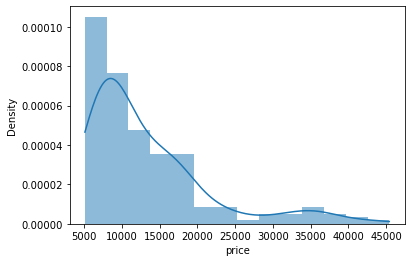

In [8]:
sns.histplot(temp['price'], kde=True, stat="density", linewidth=0)

<AxesSubplot:xlabel='price', ylabel='Density'>

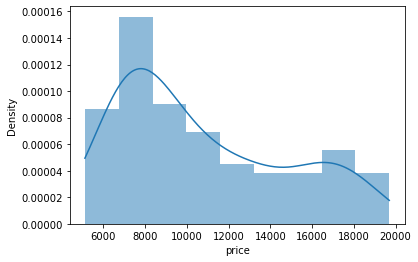

In [9]:
temp1 = temp.loc[temp['price']<=20000]
sns.histplot(temp1['price'], kde=True, stat="density", linewidth=0)

In [10]:
temp1[temp1.price < 20000].head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [11]:
from scipy.stats import kurtosis, skew
print('skewness: {}'.format(skew(temp1['price'])))
print('kurtosis: {}'.format(kurtosis(temp1['price'])))

skewness: 0.6326373020794779
kurtosis: -0.8517120230509656


### 5. Визуализировать несколько взаимосвязей между переменными

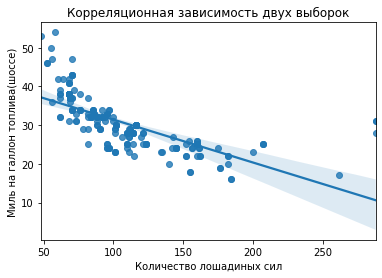

In [12]:
horsepower = temp['horsepower']
highwayMpg = temp['highway-mpg']
# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x = horsepower, y = highwayMpg, data = temp, fit_reg = True)
plt.xlabel('Количество лошадиных сил')
plt.ylabel('Миль на галлон топлива(шоссе)')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

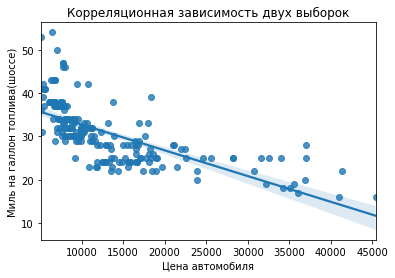

In [13]:
price = temp['price']
highwayMpg = temp['highway-mpg']
# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x = price, y = highwayMpg, data = temp, fit_reg = True)
plt.xlabel('Цена автомобиля')
plt.ylabel('Миль на галлон топлива(шоссе)')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

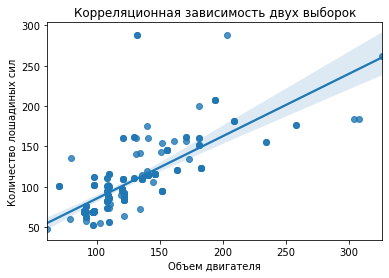

In [14]:
horsepower = temp['horsepower']
engineSize = temp['engine-size']
# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x = engineSize, y = horsepower, data = temp, fit_reg = True)
plt.xlabel('Объем двигателя')
plt.ylabel('Количество лошадиных сил')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

### 6. Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.

#### H0 = Двигатели на бензине затрачивают столько же, сколько и на дизеле 

In [15]:
from scipy import stats
small_1 = temp[temp['fuel-type']=='gas']['highway-mpg']
small_2 = temp[temp['fuel-type']=='diesel']['highway-mpg']
print(stats.ttest_ind(small_1, small_2))

Ttest_indResult(statistic=-2.7782750192973515, pvalue=0.005977403875730944)


Вывод: pvalue < 0.05  => гипотеза неверная 

C:\Users\danir\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\danir\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


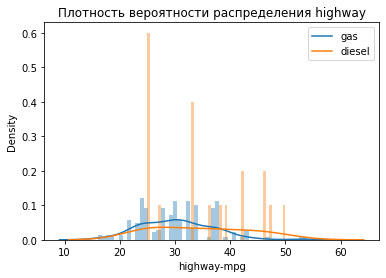

In [16]:
sns.distplot(small_1, 50)
sns.distplot(small_2, 50)
plt.title('Плотность вероятности распределения highway')
plt.legend(['gas','diesel'])
plt.show()

#### H1 = Количество лошадиных сил не зависит от количества двере 

In [17]:
from scipy import stats
small_1 = temp[temp['num-of-doors']=='two']['horsepower']
small_2 = temp[temp['num-of-doors']=='four']['horsepower']
print(stats.ttest_ind(small_1, small_2))

Ttest_indResult(statistic=1.751752162461837, pvalue=0.08132653356299467)


Вывод: pvalue > 0.05  => гипотеза верная 

C:\Users\danir\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\danir\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


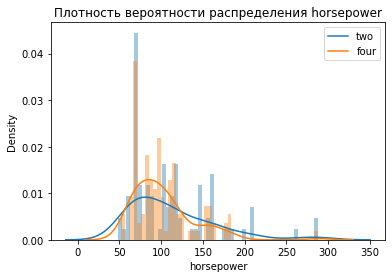

In [18]:
sns.distplot(small_1, 50)
sns.distplot(small_2, 50)
plt.title('Плотность вероятности распределения horsepower')
plt.legend(['two','four'])
plt.show()

#### H2 = Полная снареженная масса автомобиля не зависит от типа кузова (хетчбек, кабриолет) 

In [21]:
from scipy import stats
small_1 = temp[temp['body-style']=='hatchback']['curb-weight']
small_2 = temp[temp['body-style']=='convertible']['curb-weight']
print(stats.ttest_ind(small_1, small_2))

Ttest_indResult(statistic=-2.5057191534440633, pvalue=0.014418775920028886)


Вывод: pvalue < 0.05  => гипотеза неверная 

C:\Users\danir\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\danir\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


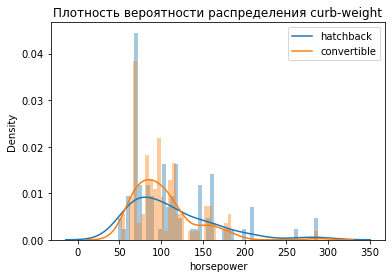

In [20]:
sns.distplot(small_1, 50)
sns.distplot(small_2, 50)
plt.title('Плотность вероятности распределения curb-weight')
plt.legend(['hatchback','convertible'])